**BUILDING A CNN FOR CIFAR 10 DATASET**



**LOADING REQUIRED LIBRARIES**

In [1]:
import keras as k 
from keras.datasets import cifar10
from matplotlib import pyplot as p
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D



Using TensorFlow backend.


**LOADING CIFAR 10 DATASET**

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 40s 0us/step


**HYPERPARAMETERS SETTINGS USED FOR MODEL**

In [0]:
# hyperparameter settings
no_class = 10 
batch_size = 64
epoch = 25
learning_rate = 0.0001


**PREPROCESSING DATA**

In [0]:
# Data Preprocessing
y_train = k.utils.to_categorical(y_train, no_class)
y_test = k.utils.to_categorical(y_test, no_class)

# pixel values range from 0 to 255 - normalize 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255


**MODEL CREATION:**

**Layers Configuration: **

*   Convolutional input layer: 64 feature maps with 3×3 size

     Activation Function used: Relu

*   Batch Normalization layer

*   Convolutional input layer: 64 feature maps with 3×3 size

     Activation Function used: Relu

*  Batch Normalization layer

*   Max Pool layer with size 2×2

*   Drop out set to 25%

*   Convolutional input layer: 64 feature maps with 3×3 size
     
     Activation Function used: Relu

*   Batch Normalization layer

*   Convolutional input layer: 64 feature maps with 3×3 size
     
     Activation Function used: Relu

*   Batch Normalization layer

*   Max Pool layer with size 2×2

*   Drop out set to 30 %

*   Flatten layer

*   Fully connected layer with 512 units
     
     Activation Function used: Relu

*   Dropout set to 25%

*   Fully connected output layer with 10 units
     
     Activation Function used: Softmax






      


  

In [0]:
def model_creation():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(.3))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(no_class))
  model.add(Activation('softmax'))
  opt = optimizers.rmsprop(lr=learning_rate, decay=1e-6)
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  return model

In [0]:

cnn_basemodel = model_creation() 
  

**MODEL TRAINING **

In [35]:
cnn_1 = cnn_basemodel.fit(x_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=(x_test,y_test),shuffle=True)
acc = cnn_basemodel.evaluate(x_test, y_test, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 28s 560us/step - loss: 0.1323 - acc: 0.9558 - val_loss: 0.8345 - val_acc: 0.8236
Epoch 2/30
50000/50000 [==============================] - 28s 557us/step - loss: 0.1297 - acc: 0.9569 - val_loss: 0.7582 - val_acc: 0.8135
Epoch 3/30
50000/50000 [==============================] - 28s 557us/step - loss: 0.1244 - acc: 0.9579 - val_loss: 0.7985 - val_acc: 0.8151
Epoch 4/30
50000/50000 [==============================] - 28s 556us/step - loss: 0.1193 - acc: 0.9611 - val_loss: 0.8718 - val_acc: 0.8226
Epoch 5/30
50000/50000 [==============================] - 28s 557us/step - loss: 0.1246 - acc: 0.9592 - val_loss: 0.7888 - val_acc: 0.8241
Epoch 6/30
50000/50000 [==============================] - 28s 558us/step - loss: 0.1209 - acc: 0.9602 - val_loss: 0.7357 - val_acc: 0.8138
Epoch 7/30
50000/50000 [==============================] - 28s 558us/step - loss: 0.1205 - acc: 0.9609 - val_loss: 0.

**PERFORMANCE METRICS:**

*   Model Accuracy
*   Model Loss

In [0]:
def plot_modelacc(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['acc'])
            p.plot(fit_model.history['val_acc'])
            p.title("MODEL ACCURACY")
            p.xlabel("# of EPOCHS")
            p.ylabel("ACCURACY")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()

In [0]:
def plot_model_loss(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['loss'])
            p.plot(fit_model.history['val_loss'])
            p.title("MODEL LOSS")
            p.xlabel("# of EPOCHS")
            p.ylabel("LOSS")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()


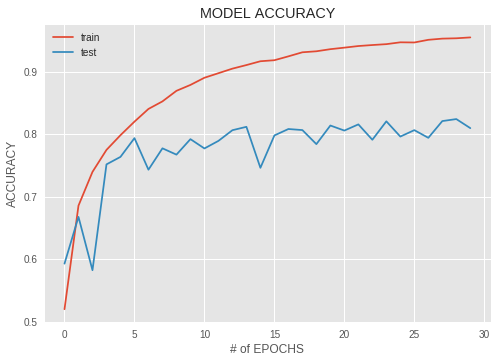

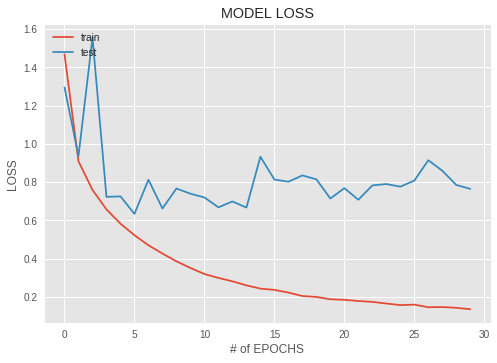

In [33]:
plot_modelacc(cnn_1)
plot_model_loss(cnn_1)

In [34]:
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

Test data loss: 0.7643361328601838
Test data accuracy: 80.95


In [36]:
cnn_basemodel.layers
